In [33]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요  노인 심각
추출할 뉴스기사의 숫자를 입력해주세요  1000


,title,url
0,"경찰, '노인 교통사고 예방' 백일섭·김성환에 감사장",http://www.newsis.com/view/?id=NISX20220818_00...
1,"[칼럼] 농촌, 노인 인구 어디까지 갈 것인가!",http://www.jeollailbo.com/news/articleView.htm...
2,53개 지표로 확인된 경남 낙후성 ‘심각’,https://news.kbs.co.kr/news/view.do?ncd=553354...
3,53개 지표로 확인된 경남 낙후성 ‘심각’,https://news.kbs.co.kr/news/view.do?ncd=553328...
4,"윤석명 ""노인 소득양극화 심각, 동일연금제도 필요""",http://www.inews24.com/view/1508663
...,...,...
995,"노인 빈곤, 더 이상 방치는 안 된다",http://www.cctoday.co.kr/?mod=news&act=article...
996,"'고용 통계' 두고 나홀로 긍정 해석한 文정부…""현실은 더 심각""",http://www.inews24.com/view/1451224
997,"대구수성경찰서, 노인 교통사고예방 캠페인",http://www.ksmnews.co.kr/default/index_view_pa...
998,[열린마당] 노인빈곤율 OECD 1위… 더 이상 방관 안돼,http://www.segye.com/content/html/2018/05/24/2...


In [44]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [45]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = ['노인','노인학','심각','예방','문제','전문','한국']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
빈곤,115
학대,66
사회,60
보호,51
기관,44
...,...
무관심,1
정읍,1
긍정,1
해석,1


In [46]:
df_test= df[df['cnt'] > 10]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 

In [47]:
df_stop_words = df_test.head(20)
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,빈곤,115
1,학대,66
2,사회,60
3,보호,51
4,기관,44
5,고령화,42
6,교육,36
7,기념,35
8,치매,35
9,캠페인,34


In [48]:
stop_word = df_stop_words['index'].tolist()
#stop_word

In [51]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word =['노인','노인학','심각','예방','문제','전문','한국']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

In [52]:
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
빈곤,115
학대,66
사회,60
보호,51
기관,44
...,...
무관심,1
정읍,1
긍정,1
해석,1


In [53]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')# 한글 폰트 설정

(-0.5, 3999.5, 2999.5, -0.5)

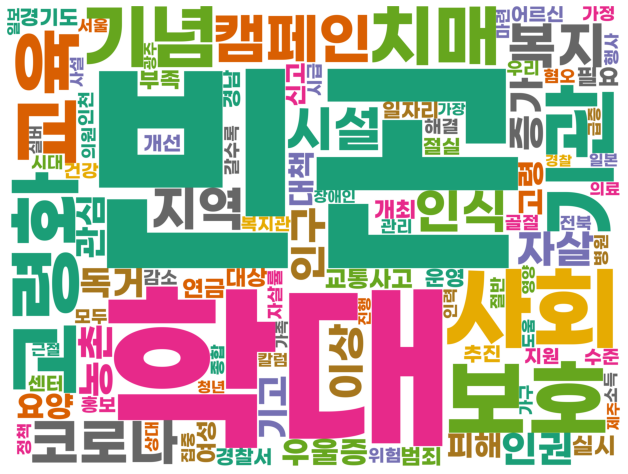

In [56]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=100).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기

In [57]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요  노인 문제
추출할 뉴스기사의 숫자를 입력해주세요  1000


,title,url
0,"LGU+, 노인 낙상 감지 '스마트레이더' 개발",https://zdnet.co.kr/view/?no=20220822091319
1,"LG 유플러스 레이더서비스 개발…""노인·장애인 안전사고, 기술 이용해 예방""",http://news.tvchosun.com/site/data/html_dir/20...
2,"새마을금고재단, 노인복지시설에 1.5억상당 차량지원",http://www.edaily.co.kr/news/newspath.asp?news...
3,"고양시대화노인종합복지관, 취약계층 디지털 교육 실시",https://www.siminilbo.co.kr/news/newsview.php?...
4,3일간 실종된 치매 노인 찾고 보니 주머니에 돈 다발이..대체 무슨 일?,https://nownews.seoul.co.kr/news/newsView.php?...
...,...,...
995,"인천시, '노인 자살예방 영상' 콘텐츠 제작",http://www.cstimes.com/news/articleView.html?i...
996,"경기도, 사회복지기금 노인복지 지원사업 참여 기관 모집",https://www.asiatoday.co.kr/view.php?key=20220...
997,"윤석열 ""기초연금 1인당 40만원으로 올려 노인빈곤 해소""",https://hankookilbo.com/News/Read/A20220216185...
998,"인천시, 노인 자살예방 위한 영상 콘텐츠 제작",https://www.dnews.co.kr/uhtml/view.jsp?idxno=2...


In [58]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [59]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = []
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
노인,704
복지,88
문제,77
개발,65
안전,65
...,...
소상,1
공인,1
금세,1
요실금,1


In [60]:
df_test= df[df['cnt'] > 10]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 

In [61]:
df_stop_words = df_test.head(20)
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,노인,704
1,복지,88
2,문제,77
3,개발,65
4,안전,65
5,노인학,62
6,사회,58
7,독거,57
8,예방,55
9,지원,49


In [63]:
stop_word = df_stop_words['index'].tolist()
#stop_word

In [ ]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word =[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

In [ ]:
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

In [1]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요  노인 교육
추출할 뉴스기사의 숫자를 입력해주세요  1000


,title,url
0,"서귀포시, 홀로 사는 노인 실태조사 추진",http://news.tf.co.kr/read/national/1960088.htm
1,"조시영 대창 회장, 군산교육발전진흥재단에 1000만원 기탁",https://www.news1.kr/articles/4779548
2,"LH, 80세이상 독거노인 ‘생활돌봄 서비스’ 시범실시",https://www.khan.co.kr/economy/real_estate/art...
3,"익산소방서, 노인일자리 참여자 소방안전교육",http://sjbnews.com/news/news.php?number=754540
4,"울진군노인복지관, 하반기 교육프로그램 수강생 모집",http://www.nspna.com/news/?mode=view&newsid=58...
...,...,...
995,"서울시약, 8월 10일 노인약료 전문가 11주 교육 개강",http://www.dailypharm.com/Users/News/NewsView....
996,[포토뉴스]홍천청소년수련관 바리스타 교육,http://www.kwnews.co.kr/page/view/202207271004...
997,"울진 금강송면, 노인일자리사업 실시",http://www.ksmnews.co.kr/default/index_view_pa...
998,"대한노인회 전남 무안군지회, 483명 대상 노인일자리 혹서기 활동교육 성료",http://www.100ssd.co.kr/news/articleView.html?...


In [48]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체
text

'서귀포시 홀로 사는 노인 실태조사 추진 조시영 대창 회장 군산교육발전진흥재단에 만원 기탁 세이상 독거노인 생활돌봄 서비스 시범실시 익산소방서 노인일자리 참여자 소방안전교육 울진군노인복지관 하반기 교육프로그램 수강생 모집 고양시대화노인종합복지관 취약계층 디지털 교육 실시 한국노인인력개발원 생활돌봄서비스 시범사업 추진 합천 여성결혼이민자 정착 역량 강화 교육 삼문동 경로당 보조금 정산 관련 교육 실시 부안소방서 재난취약대상 심폐소생술 등 안전교육 한국노인인력개발원 생활돌봄서비스 시범사업 추진 세 인간 어떤 노인으로 살 것인가 가지 노인의 유형 합천 여성결혼이민자 정착 역량 강화 교육 상주시니어클럽 노인일자리 참여자 통합교육 삼문동 경로당 보조금 정산 관련 교육 실시 부안소방서 재난취약대상 심폐소생술 등 안전교육 청도농협 노인복지기금 만원 청도군에 전달 노인 성생활이 삶에 미치는 영향 세 만학도 박사의 논문 부안 하서면 노인사회활동지원사업 참여자 안전 건강교육 실시 홍성소방서 어르신 위한 맞춤형 소방안전교육 실시 아라뱃길지사 노인일자리 참여 어르신 대상 혹서기 안전교육 실시 교육칼럼 박주정 광주광역시 서부교육지원청 교육장 지자체들 경로당 어르신 대상 구강보건교육 강화 울산 고령사회 진입 목전 시민들 노인복지 대책 강화해야 우리 지회 자랑 대한노인회 대전 유성구지회 회원 대비 노인일자리 참 진천군노인복지관 웰다잉 프로그램 호응 건국대학교 미래지식교육원 년 학기 스포츠건강학 전공 신편입생 모집 햄버거 주문은 이렇게 울산시 노인 대상 디지털 교육 디지털 격차 해소 위해 교육 프로그램 외 시스템 간소화 필요 천안시노인종합복지관 영화관 키오스크 체험 진행 천안시 노인 교통사고 막는다 안전 대책 강화 청도농협 직원 일동 노인복지기금 천만원 기탁 넷 원격평생교육원 사회복지사 건강가정사 동시 취득패키지 수강생 모집 대구 동구청 노인일자리사업 참여자 안전교육 실시 창녕군 시니어클럽 무료 인지선별검사 양성교육 시행 완주군 이서면 노인일자리 어르신 인권 함양 울산인구 가 세이상 노인

In [49]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = []
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
노인,660
교육,471
실시,164
일자리,130
복지관,107
...,...
범죄,1
시약,1
홍천,1
금강송,1


In [50]:
df_test= df[df['cnt'] > 10]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 

In [51]:
df_stop_words = df_test.head(20)
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,노인,660
1,교육,471
2,실시,164
3,일자리,130
4,복지관,107
5,안전교육,101
6,사업,99
7,대상,88
8,참여자,79
9,예방,72


In [52]:
stop_word = df_stop_words['index'].tolist()
#stop_word

In [73]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word =['노인','교육','실시','사업','예방','어르신','센터','복지','대상','참여자','지원','운영','맞춤','시설','사회','협약','종합','활동','서비스','복지관','강화','경로당','업무',
           '추진','생활','진행','개최','모집','기관','계층','역량','학교','체결','피해','프로그램','안전교육']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

In [74]:
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
일자리,130
소방,66
안전,48
건강,43
디지털,40
...,...
범죄,1
시약,1
홍천,1
금강송,1


In [75]:
df_test= df[df['cnt'] > 10] 

In [76]:
df_stop_words = df_test.head(20)
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,일자리,130
1,소방,66
2,안전,48
3,건강,43
4,디지털,40
5,치매,39
6,금융,39
7,대구,37
8,체험,32
9,독거,31


In [77]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')# 한글 폰트 설정

(-0.5, 3999.5, 2999.5, -0.5)

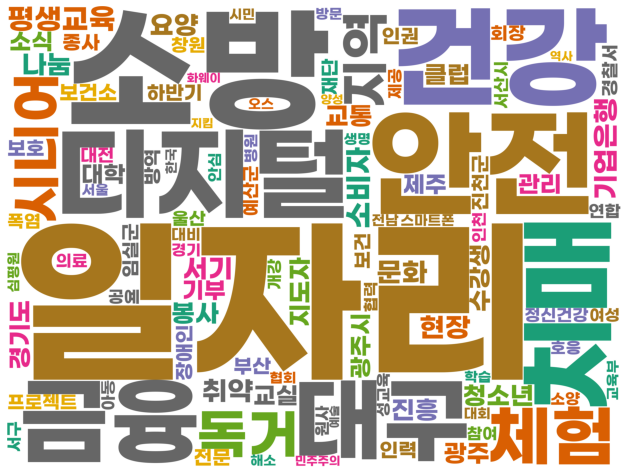

In [78]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=100).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기

In [1]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global news_df
    
    keyword = input('검색 키워드를 입력해주세요 ')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('추출할 뉴스기사의 숫자를 입력해주세요 '))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser') ##html_doc 데이터를 html.parser로 파싱한 뒤 BeautifulSoup 객체를 생성해서 bs 변수에 넣음 
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text.get('href')
            # news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요  노인 도서관
추출할 뉴스기사의 숫자를 입력해주세요  1000


,title,url
0,"[100세 인간] ③ ""어떤 노인으로 살 것인가""…4가지 노인의 유형",https://www.yna.co.kr/view/AKR2022081909130005...
1,"걸어서 도서관 갈 수 있는 곳, 서울 밖에 없다···서울 14분, 부산 32분, 인...",https://www.khan.co.kr/economy/real_estate/art...
2,"홍성도서관, 평생교육 수강생 모집",http://www.daejonilbo.com/news/articleView.htm...
3,"성남시수정도서관, ‘폭우 피해 복구지원’해피빈 기부",https://www.siminilbo.co.kr/news/newsview.php?...
4,"대구서부도서관, 취약계층 독서문화프로그램 2개 운영",http://www.newsis.com/view/?id=NISX20220818_00...
...,...,...
995,"탐라도서관, 노인 독서 활성화에 앞장 선다",http://www.jejusori.net/news/articleView.html?...
996,"대한노인회 부산 금정구지회, 전용 탁구장 개장",http://www.100ssd.co.kr/news/articleView.html?...
997,[오늘의 국회토론회-10일]노인 학대예방 위한 '국제포럼' 열린다,http://news.mt.co.kr/mtview.php?no=20190909174...
998,[MBN 연속기획 '은퇴는 없다' ①] 나이 차별 금지…양질 일자리 취업하는 미국...,http://www.mbn.co.kr/pages/vod/programContents...


In [2]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체
#text

In [18]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = ['도서관','노인','운영','복지관']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기


data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

df

,cnt
독서,107
문화,79
프로그램,77
시립,62
사업,58
...,...
금지,1
양질,1
미국,1
조원,1


In [19]:
df_test= df[df['cnt'] > 10]  #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 

In [20]:
df_stop_words = df_test.head(20)
df_stop_words = df_stop_words.reset_index()
df_stop_words

,index,cnt
0,독서,107
1,문화,79
2,프로그램,77
3,시립,62
4,사업,58
5,일자리,53
6,서비스,46
7,복지,46
8,지원,45
9,개관,43


In [21]:
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='AppleGothic')# 한글 폰트 설정

(-0.5, 3999.5, 2999.5, -0.5)

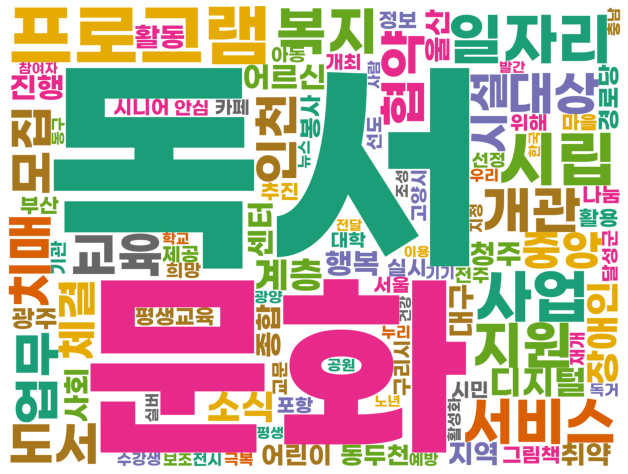

In [22]:
from wordcloud import WordCloud

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=100).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기